In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
df=pd.read_csv("/content/sample_data/compete.csv")

In [66]:
df.head()

,Id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0
1,2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0
2,3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0
3,4,0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0
4,5,0,tcp,http,SF,159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148206 entries, 0 to 148205
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Id                           148206 non-null  int64  
 1   duration                     148206 non-null  int64  
 2   protocol_type                148206 non-null  object 
 3   service                      148206 non-null  object 
 4   flag                         148206 non-null  object 
 5   src_bytes                    148206 non-null  int64  
 6   dst_bytes                    148206 non-null  int64  
 7   land                         148206 non-null  int64  
 8   wrong_fragment               148206 non-null  int64  
 9   urgent                       148206 non-null  int64  
 10  hot                          148206 non-null  int64  
 11  num_failed_logins            148206 non-null  int64  
 12  logged_in                    148206 non-null  int64  
 13 

In [68]:
df.isnull().sum()

Id                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

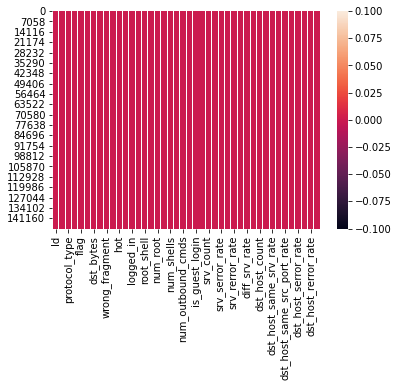

In [69]:
#visualize null values
sns.heatmap(df.isnull())
plt.show()

In [9]:
df_train=pd.read_csv("/content/sample_data/dev.csv")

In [10]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,94,56,0.60,0.03,0.01,0.00,0.0,0.0,0.0,0.00,0
1,4,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,250,0.98,0.01,0.01,0.00,0.0,0.0,0.0,0.00,0
2,0,tcp,http,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,13,255,1.00,0.00,0.08,0.24,0.0,0.0,1.0,0.99,0
3,0,tcp,http,SF,310,2268,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22,255,1.00,0.00,0.05,0.04,0.0,0.0,0.0,0.00,0
4,0,udp,domain_u,SF,46,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,54,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0


In [11]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345815 entries, 0 to 345814
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     345815 non-null  int64  
 1   protocol_type                345815 non-null  object 
 2   service                      345815 non-null  object 
 3   flag                         345815 non-null  object 
 4   src_bytes                    345815 non-null  int64  
 5   dst_bytes                    345815 non-null  int64  
 6   land                         345815 non-null  int64  
 7   wrong_fragment               345815 non-null  int64  
 8   urgent                       345815 non-null  int64  
 9   hot                          345815 non-null  int64  
 10  num_failed_logins            345815 non-null  int64  
 11  logged_in                    345815 non-null  int64  
 12  num_compromised              345815 non-null  int64  
 13 

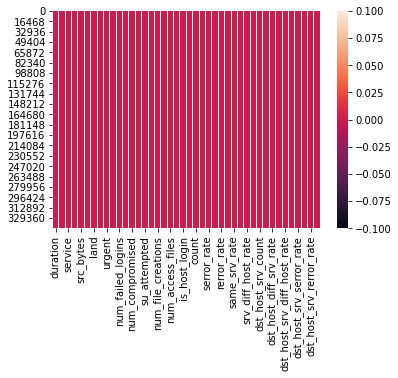

In [13]:
#visualize null values
sns.heatmap(df_train.isnull())
plt.show()

In [14]:
#separate numerical type column and object type column from dataset and hold
#this data into new dataset named as df_num and df_cat respectively
df_num=df_train.select_dtypes(["float64","int64"])
df_cat=df_train.select_dtypes("object")#


In [15]:
#apply LabelEncoder
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    #create object of LabelEncoder
    le=LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
#check
df_cat.head()

,protocol_type,service,flag
0,2,45,9
1,2,45,9
2,1,22,1
3,1,22,9
4,2,11,9


In [16]:
#to concatenate df_num,df_cat and hold in new data frame df_new
df_new = pd.concat([df_num,df_cat],axis=1)
df_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,protocol_type,service,flag
0,0,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,94,56,0.60,0.03,0.01,0.00,0.0,0.0,0.0,0.00,0,2,45,9
1,4,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,250,0.98,0.01,0.01,0.00,0.0,0.0,0.0,0.00,0,2,45,9
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,13,255,1.00,0.00,0.08,0.24,0.0,0.0,1.0,0.99,0,1,22,1
3,0,310,2268,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22,255,1.00,0.00,0.05,0.04,0.0,0.0,0.0,0.00,0,1,22,9
4,0,46,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,54,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0,2,11,9


In [17]:
X=df_new.drop("class",axis=1) #input features
Y=df_new["class"] #target means labelled output

In [18]:
#train_test_split means we divide data into 70% and 30%  from dataset 
#call class train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [19]:
#create user defined function create_model()
def create_model(model):
    model.fit(X_train,Y_train)#we train the model
    y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_test,y_pred))
    return model

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
#Use Logistic Regression Algorithm 
from sklearn.linear_model import LogisticRegression  

In [22]:
#create a object of LogisticRegression  
lr=LogisticRegression()

In [23]:
#call the function
lr=create_model(lr) 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     20495
           1       1.00      0.98      0.99     83250

    accuracy                           0.98    103745
   macro avg       0.96      0.99      0.97    103745
weighted avg       0.98      0.98      0.98    103745

Confusion Matrix : 
[[20346   149]
 [ 1542 81708]]


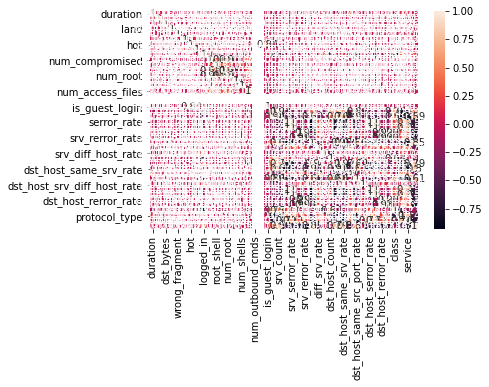

In [70]:
#check correlation each input with output and also check each input with 
#each other  use inbuilt method corr()
#we visualise corr()
sns.heatmap(df_new.corr(),annot=True)
plt.show()

In [71]:

#Apply feature selection technique 
#Apply ANOVA TEST  : - 
#Formula of ANOVA Test 
#F-Test=variance between the group/variance within the group

In [26]:
from sklearn.feature_selection import f_regression #if ANOVA Test
from sklearn.feature_selection import SelectKBest #SelectKBest : always call for anova or chi-2 test

In [27]:
#Create the object of SelectKBest  class
anova=SelectKBest(score_func=f_regression,k=6) #k means select imp input features
#select imp input 6 out of 14 input
#anova user defined object

In [28]:
#select imp input 6 out of 14 input
X_train_imp=anova.fit_transform(X_train,Y_train)

In [29]:
X_test_imp=anova.transform(X_test) #testing input 30%
#select imp input 6 out of 14 input

In [30]:
#To show imp input features ,return answer in boolean for means True/False
anova.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False, False])

In [31]:
X.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'protocol_type', 'service', 'flag'],
      dtype='object')

In [32]:
#Again object of LogisticRegression class after apply anova test (imp features select)
lr1=LogisticRegression()

In [33]:
#train the model with the imp input features which select from anova test
lr1.fit(X_train_imp,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#check score (testing phase)
lr1.score(X_test_imp,Y_test)

0.9845679309846258

In [35]:
#ChI-square TEST 
#first check : - value of all columns either value is +ve or -ve if -ve value found then
#this features will not apply


for col in X:
    print(col)
    print(df[col].unique())

duration
[   0    8    1 ... 2553 2751  120]
src_bytes
[239 235 219 ... 484 475 494]
dst_bytes
[   486   1337   1940 ...   3842   6496 150638]
land
[0 1]
wrong_fragment
[0 1 3]
urgent
[0 1]
hot
[ 0 30 24  6  1  5 17  4 14 22  7 16  2 19  3 12 20 28 18]
num_failed_logins
[0 1]
logged_in
[1 0]
num_compromised
[  0   2   4   1   3   7  22   6   5  12 884]
root_shell
[0 1]
su_attempted
[0 1 2]
num_root
[  0   2   1   3   5   9   6   4  39   7  14 993]
num_file_creations
[ 0  1  2 15  9  4  5  8 12 20]
num_shells
[0 1 2]
num_access_files
[0 2 1 8]
num_outbound_cmds
[0]
is_host_login
[0]
is_guest_login
[0 1]
count
[  8   6   1   5   7  17   3  13   2   4  28  10   9  27  11  22  23  12
  14  24  29  25  19  26  36  37  41  20  34  21  18  15  16  31  33  43
  32  30  40  39  38  35  45  55  42  52  60  49  79  46  76  48 509 511
 330 351 510 383 394  61 444 462 471 497 498 154 172 189 205 233  73  65
  63  59  44  69  81  72  82  47  71  78  56  58  62  83  84  89  92  94
  97  99  66  88 11

In [36]:
#if value of input column is not -ve then how to apply chi-2 test in dataset for select imp features

from sklearn.feature_selection import chi2 

In [37]:
#create object of SelectKbest class and passing chi2 as a parameter
chi=SelectKBest(score_func=chi2,k=10) #k is a parameter which gives no. of imp features select


In [38]:
#select imp input 10 out of 14 input
X_train_imp1=chi.fit_transform(X_train,Y_train) 

In [39]:
#1. forward selection wrapper method : 
#we create a empty list for columns 
columns=[] #declare empty list
for col in X:
    #print(col)
    columns.append(col)#add new element(column) at last
    #print(columns)
    X_new=df_new[columns] #input
    #print(X_new)
    
    #lets call the train_test_split
    X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.3,random_state=1)
    #create the object of LinearRegression class
    lr=LogisticRegression()
    lr.fit(X_train,Y_train) #train the model
    score=lr.score(X_test,Y_test)
    print("Col : ",columns, " Score : ",score)

Col :  ['duration']  Score :  0.8103426671164875
Col :  ['duration', 'src_bytes']  Score :  0.8106511157164201
Col :  ['duration', 'src_bytes', 'dst_bytes']  Score :  0.8240397127572413
Col :  ['duration', 'src_bytes', 'dst_bytes', 'land']  Score :  0.8240589907947371
Col :  ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment']  Score :  0.8240589907947371
Col :  ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent']  Score :  0.8240589907947371
Col :  ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']  Score :  0.824155380982216
Col :  ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins']  Score :  0.824155380982216
Col :  ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in']  Score :  0.9466576702491686
Col :  ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'l

In [40]:
#IMp Input features  select with the help of forward  selection : get score 0.98

In [50]:
#Apply decisionTreeClassifier : this is select algorithm of classification ,Its help to select imp
#features to predict the o/p.
from sklearn.tree import DecisionTreeClassifier

In [51]:
#create the object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier() #by default gini index method to select imp features

In [53]:
from sklearn import tree

In [54]:
features=X.columns

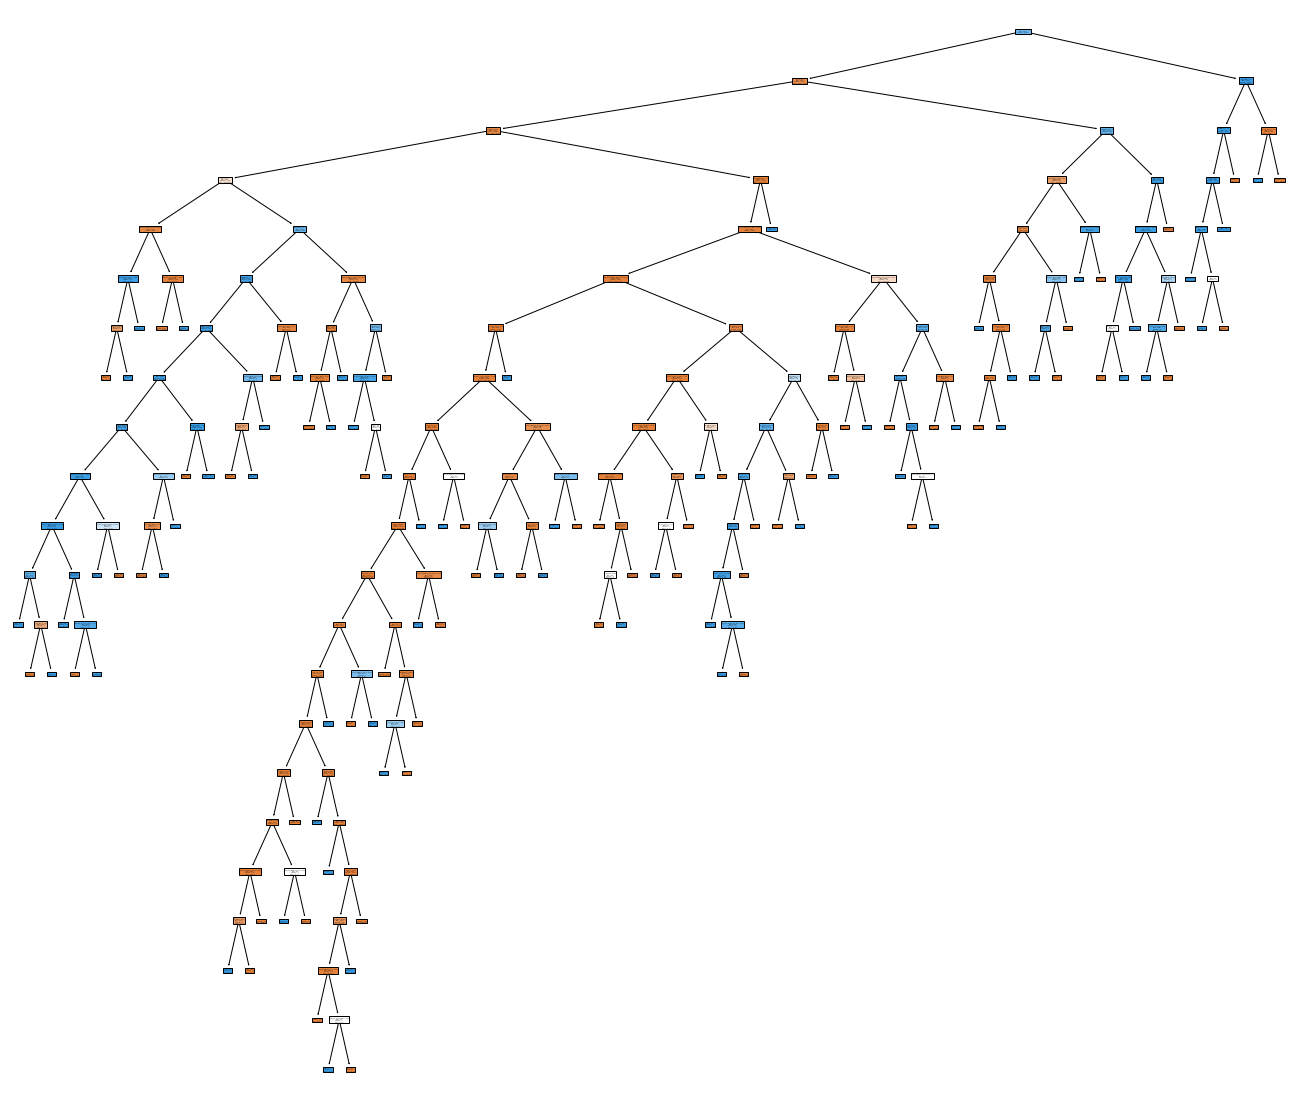

In [55]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [56]:
#1. max_depth parameter : it cannot >8 
#create the object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(max_depth=4) #by default gini index

In [57]:
#call function 
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20495
           1       1.00      1.00      1.00     83250

    accuracy                           1.00    103745
   macro avg       0.99      0.99      0.99    103745
weighted avg       1.00      1.00      1.00    103745

Confusion Matrix : 
[[20297   198]
 [  256 82994]]


In [58]:
F=dt2.feature_importances_
print(np.round(F,2))

[0.   0.03 0.02 0.   0.   0.   0.03 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.91 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02]


In [59]:
X.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'protocol_type', 'service', 'flag'],
      dtype='object')

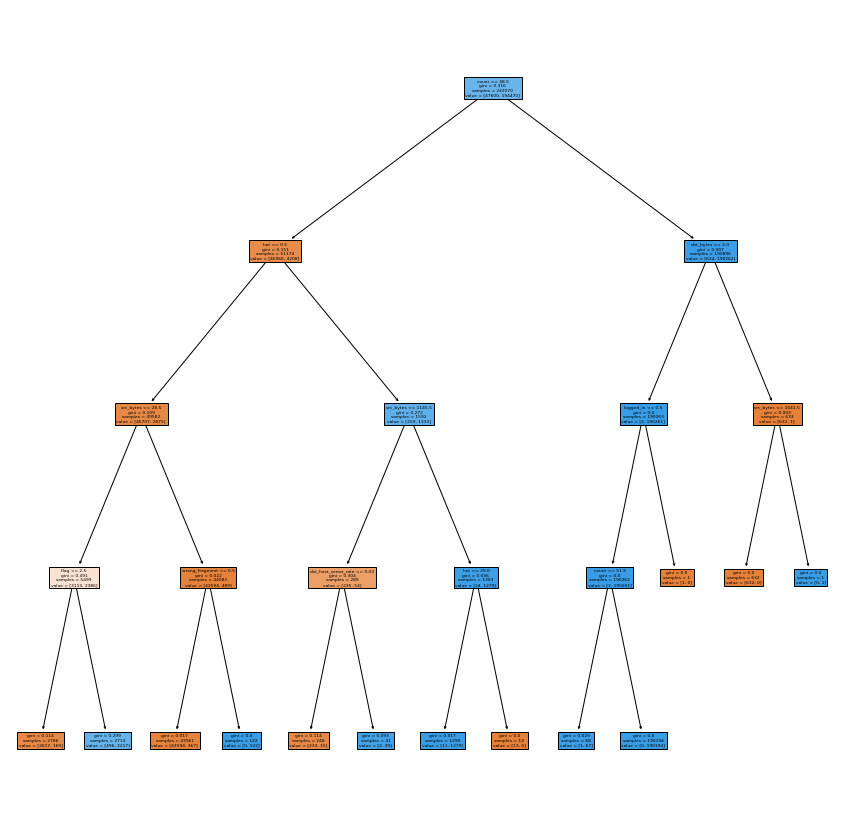

In [62]:
fig=plt.figure(figsize=(15,15))
_=tree.plot_tree(dt2,feature_names=features,filled=True)